# Organisation des données

Les données sont utilisées àchaque étape dans les flux de travail en sciences. Elles alimentent l'analyse, et la modélisation. Les résultats qui en découlent sont aussi des données qui peuvent alimenter les travaux subséquents. Une bonne organisation des données facilitera le flux de travail.

> **Dicton**. Proportions de temps voué aux calcul scientifique: 80% de nettoyage de données mal organisées, 20% de calcul.

Qu'est-ce qu'une donnée? De manière abstraite, il s'agit d'une valeur associée à une variable. Une variable peut être une dimension, une date, une couleur, le résultat d'un test statistique, à laquelle on attribue la valeur quantitative ou qualitative d'un chiffre, d'une chaîne de charactère, d'un symbole conventionné, etc. Par exemple, lorsque vous commandez un café *latte* végane, *au latte* est la valeur que vous attribuez à la variable *type de café*, et *végane* est la valeur de la variable *type de lait*.

L'exemple est peut être horrible. J'ai besoin d'un café...

![](https://media.giphy.com/media/3nbxypT20Ulmo/giphy.gif)

Ce chapitre traite de l'importation, l'utilisation et l'exportation de données structurées, en R, sous forme de vecteurs, matrices, tableaux et ensemble de tableaux (bases de données).

Bien qu'il soit toujours préférable d'organiser les structures qui accueilleront les données d'une expérience avant-même de procéder à la collecte de données, l'analyste doit s'attendre à réorganiser ses données en cours de route. Or, des données bien organisées au départ faciliteront aussi leur réoganisation.

Ce chapitre débute avec quelques définitions: les données, les matrices, les tableaux et les bases de données, ainsi que leur signification en R. Puis nous verrons comment organiser un tableau selon quelques règles simples, mais importantes pour éviter les erreurs et les opérations fastidieuses pour reconstruire un tableau mal conçu. Ensuite, nous traiterons des formats de tableau courrant, pour enfin passer à l'utilisation de [`dplyr`](http://pandas.pydata.org), le module tidyverse pour effectuer des opérations sur les tableaux.

## Les collections de données

Dans le chapitre 2, nous avons survoler différents types d'objets: réels, entiers, chaînes de caractères et booléens. Les données peuvent appartenir à d'autres types: dates, catégories ordinales (ordonnées: faible, moyen, élevé) et nominales (non ordonnées: espèces, cultivars, couleurs, unité pédodlogique, etc.). Comme mentionné en début de chapitre, une donnée est une valeur associée à une variable. Les données peuvent être organisées en collections.

Nous avons vu au chapitre 2 que la manière privilégiée d'organiser des données était sous forme de **tableau**. De manière générale, un tableau de données est une organisation de données en deux dimensions, comportant des *lignes* et des *colonnes*. Il est préférable de respecter la convention selon laquelle les lignes sont des observations et les colonnes sont des variables. Ainsi, un tableau est une collection de vecteurs de même longueur, chaque vecteur représentant une variable. Chaque variable est libre de prendre le type de données approprié. La position d'une donnée dans le vecteur correspond à une observation.

Imaginez que vous consignez des données de différents sites (A, B et C), et que chaque site possède ses propres caractéristiques. Il est redondant de décrire le site pour chaque observation. Vous préférerez créer deux tableaux: un pour décrire vos observations, et un autre pour décrire les sites. De cette manière, vous créez une collection de tableaux intereliés: une **base de données**. R peut soutirer des données des bases de données grâce au module DBI, qui n'est pas couvert à ce stade de développement du cours.

Dans R, les données structurées en tableaux, ainsi que les opérations sur les tableaux, peuvent être gérés grâce aux modules readr, dplyr et tidyr. Mais avant de se lancer dans l'utilisation de ces modules, voyons quelques règles à suivre pour bien structurer ses données en format *tidy*, un du jargon tidyverse qui signifie *proprement organisé*.

## Organiser un tableau de données

Afin de reprérer chaque cellule d'un tableau, on attribue à chaque lignes et à chaque colonne colonnes un identifiant *unique*, que l'on nomme *indice* pour les lignes et *entête* pour les colonnes.

> **Règle no 1.** Une variable par colonne, une observation par ligne, une valeur par cellule.

Les unités expérimentales sont décrits par une ou plusieurs variables par des chiffres ou des lettres. Chaque variable devrait être présente en une seule colonne, et chaque ligne devrait correspondre à une unité expérimentale où ces variables ont été mesurées. La règle parait simple, mais elle est rarement respectée. Prenez par exemple le tableau suivant.

| Site | Traitement A | Traitement B | Traitement C |
| --- | --- | --- | --- |
| Sainte-Zéphirine | 4.1 | 8.2 | 6.8 |
| Sainte-Aurélie | 5.8 | 5.9 | NA |
| Saint-Serge-Étienne | 2.9 | 3.4 | 4.6 |

*Tableau 1. Rendements obtenus sur les sites expérimentaux selon les traitements.*

Qu'est-ce qui cloche avec ce tableau? Chaque ligne est une observation, mais contient plussieurs observations d'une même variable, le rendement, qui devient étalé sur plusieurs colonnes. *À bien y penser*, le type de traitement est une variable et le rendement en est une autre:

| Site | Traitement | Rendement |
| --- | --- | --- |
| Sainte-Zéphirine | A | 4.1 |
| Sainte-Zéphirine | B | 8.2 |
| Sainte-Zéphirine | C | 6.8 |
| Sainte-Aurélie | A | 5.8 |
| Sainte-Aurélie | B | 5.9 |
| Sainte-Aurélie | C | NA |
| Saint-Serge-Étienne | A | 2.9 |
| Saint-Serge-Étienne | B | 3.4 |
| Saint-Serge-Étienne | C | 4.6 |

*Tableau 2. Rendements obtenus sur les sites expérimentaux selon les traitements.*

Plus précisément, l'expression *à bien y penser* suggère une réflexion sur la signification des données. Certaines variables peuvent parfois être intégrées dans une même colonne, parfois pas. Par exemple, les concentrations en cuivre, zinc et plomb dans un sol contaminé peuvent être placés dans la même colonne "Concentration" ou déclinées en plusieurs colonnes Cu, Zn et Pb. La première version trouvera son utilité pour des créer des graphiques (chapitre 3), alors que la deuxième favorise le traitement statistique (chapitre 5). Il est possible de passer d'un format à l'autre grâce à la fonction `gather()` et `spread()` du module tidyr.

> **Règle no 2.** Un tableau par unité observationnelle: ne pas répéter les informations.

Rerpenons la même expérience. Supposons que vous mesurez la précipitation à l'échelle du site.

| Site | Traitement | Rendement | Précipitations |
| --- | --- | --- | --- |
| Sainte-Zéphirine | A | 4.1 | 813 |
| Sainte-Zéphirine | B | 8.2 | 813 |
| Sainte-Zéphirine | C | 6.8 | 813 |
| Sainte-Aurélie | A | 5.8 | 642 |
| Sainte-Aurélie | B | 5.9 | 642 |
| Sainte-Aurélie | C | NA | 642 |
| Saint-Serge-Étienne | A | 2.9 | 1028 |
| Saint-Serge-Étienne | B | 3.4 | 1028 |
| Saint-Serge-Étienne | C | 4.6 | 1028 |

*Tableau 3. Rendements obtenus sur les sites expérimentaux selon les traitements.*

Segmenter l'information en deux tableaux serait préférable.

| Site | Précipitations |
| --- | --- |
| Sainte-Zéphirine | 813 |
| Sainte-Aurélie | 642 |
| Saint-Serge-Étienne | 1028 |

*Tableau 4. Précipitations sur les sites expérimentaux.*

Les tableaux 2 et 4, ensemble, forment une base de données (collection organisée de tableaux). Les opérations de fusion entre les tableaux peuvent être effectuées grâce aux fonctions de jointure (`left_join()`, par exemple) du module tidyr.

> **Règle no 3.** Ne pas bousiller les données.

Par exemple.

- *Ajouter des commentaires dans des cellules*. Si une cellule mérite d'être commentée, il est préférable de placer les commentaires soit dans un fichier décrivant le tableau de données, soit dans une colonne de commentaire justaposée à la colonne de la variable à commenter. Par exemple, si vous n'avez pas mesure le pH pour une observation, n'écrivez pas "échantillon contaminé" dans la cellule, mais annoter dans un fichier d'explication que l'échantillon no X a été contaminé. Si les commentaires sont systématique, il peut être pratique de les inscrire dans une colonne `commentaire_pH`.
- *Inscrition non systématiques*. Il arrive souvent que des catégories d'une variable ou que des valeurs manquantes soient annotées différemment. Il arrive même que le séparateur décimal soit non systématique, parfois noté par un point, parfois par une virgule. Par exemple, une fois importés dans votre session, les catégories `St-Ours` et `Saint-Ours` seront traitées comme deux catégories distinctes. De même, les cellules correspondant à des valeurs manquantes ne devraient pas être inscrite parfois avec une cellule vide, parfois avec un point, parfois avec un tiret ou avec la mention `NA`. Le plus simple est de laisser systématiquement ces cellules vides.
- *Inclure des notes dans un tableau*. La règle "une colonne, une variable" n'est pas respectée si on ajoute des notes un peu n'importe où sous ou à côté du tableau.
- *Ajouter des sommaires*. Si vous ajoutez une ligne sous un tableau comprenant la moyenne de chaque colonne, qu'est-ce qui arrivera lorsque vous importerez votre tableau dans votre session de travail? La ligne sera considérée comme une observation supplémentaire.
- *Inclure une hiérarchie dans le entêtes*. Afin de consigner des données de texture du sol, comprenant la proprotion de sable, de limon et d'argile, vous organisez votre entête en plusieurs lignes. Une ligne pour la catégorie de donnée, *Texture*, fusionnée sur trois colonnes, puis trois colonnes intitullées *Sable*, *Limon* et *Argile*. Votre tableau est joli, mais il ne pourra pas être importé conformément dans un votre session de calcul: on recherche *une entête unique par colonne*. Votre tableau de données devrait plutôt porter les entêtes *Texture sable*, *Texture limon* et *Texture argile*. Un conseil: réserver le travail esthétique à la toute fin d'un flux de travail.

## Formats de tableau

Plusieurs outils sont à votre disposition pour créer des tableaux. Je vous présente ici les plus communs.

### *xls* ou *xlsx*
Microsoft Excel est un logiciel de type *tableur*, ou chiffrier électronique. L'ancien format *xls* a été remplacé par le format *xlsx* avec l'arrivée de Microsoft Office 2010. Il s'agit d'un format propriétaire, dont l'alternative libre la plus connue est le format *ods*, popularisé par la suite bureautique LibreOffice. Les formats *xls*, *xlsx* ou *ods* sont davantage utilisés comme outils de calcul que d'entreposage de données. Ils contiennent des formules, des graphiques, du formattage de cellule, etc. *Je ne les recommande pas pour stocker des données*.

### *csv*
Le format *csv*, pour *comma separated values*, est un fichier texte, que vous pouvez ouvrir avec n'importe quel éditeur de texte brut (Bloc note, [Atom](https://atom.io), [Notepad++](https://notepad-plus-plus.org), etc.). Chaque colonne doit être délimitée par un caractère cohérent (conventionnellement une virgule, mais en français un point-virgule ou une tabulation pour éviter la confusion avec le séparateur décimal) et chaque ligne du tableau est un retour de ligne. Il est possible d'ouvrir et d'éditer les fichiers csv dans un éditeur texte, mais il est plus pratique de les ouvrir avec des tableurs (LibreOffice Calc, Microsoft Excel, Google Sheets, etc.).

**Encodage des fichiers texte**. Puisque le format *csv* est un fichier texte, un souci particulier doit être porté sur la manière dont le texte est encodé. Les caractères accentués pourrait être importer incorrectement si vous importez votre tableau en spécifiant le mauvais encodage. Pour les fichiers en langues occidentales, l'encodage UTF-8 devrait être utilisé. Toutefois, par défaut, Excel utilise un encodage de Microsoft. Si le *csv* a été généré par Excel, il est préférable de l'ouvrir avec votre éditeur texte et de l'enregistrer dans l'encodage UTF-8.

### *json*
Comme le format *csv*, le format *json* indique un fichier en texte clair. Il est utilisé davantage pour le partage de données des applications web. En analyse et modélisation, ce format est surtout utilisé pour les données géoréférencées. L'encodage est géré de la même manière qu'un fichier *csv*.

### SQLite
SQLite est une application pour les bases de données relationnelles de type SQL qui n'a pas besoin de serveur pour fonctionner. Les bases de donnnées SQLite sont encodés dans des fichiers portant l'extension *db*, qui peuvent être facilement partagés.

### Suggestion
En *csv* pour les petits tableaux, en *sqlite* pour les bases de données plus complexes. Ce cours se concentre toutefois sur les données de type *csv*.

## Entreposer ses données

La manière la plus sécure pour entreposer ses données est de les confiner dans une base de données sécurisée sur un serveur sécurisé dans un environnement sécurisé et d'encrypter les communications. C'est aussi la manière la moins accessible. Des espaces de stockage nuagiques, comme Dropbox ou d'autres [options similaires](https://alternativeto.net/software/dropbox/), peuvent être pratiques pour les backups et le partage des données avec une équipe de travail (qui risque en retour de bousiller vos données). Le suivi de version est possible chez certains fournisseurs d'espace de stockage. Mais pour un suivi de version plus rigoureux, les espaces de développement (comme GitHub et GitLab) sont plus appropriés. Dans tous les cas, il est important de garder (1) des copies anciennes pour y revenir en cas d'erreurs et (2) un petit fichier décrivant les changements effectués sur les données.

## Manipuler des données en mode tidyverse

Le méta-module tidyverse regroupe une collection de précieux modules  pour l'analyse de données en R. Il permet d'importer des données dans votre session de travail avec readr, de les explorer avec ggplot2, de les transformer avec tidyr et dplyr et de les exporter aevc readr. Les tableaux de classe *data.frame*, comme ceux de la plus moderne classe *tibble*, peuvent être manipulés à travers le flux de travail pour l'analyse et la modélisation (chapitres suivants). Comme c'était le cas pour le chapitre sur la visualisation, ce chapitre est loin de couvrir les nombreuses fonctionnalités qui sont offertes dans le tidyverse.

### Importer vos données dans voter session de travail

Supposons que vous avec bien organisé vos données en mode *tidy*. Pour les importer dans votre session et commencer à les inspecter, vous lancerez une des commandes du module readr, décrites dans la documentation dédiée.

- ` read_csv()` si le séparateur de colonne est une virgule
- ` read_csv2()` si le séparateur de colonne est un point-virgule et que le séparateur décimal est une virgule
- ` read_tsv()` si le séparateur de colonne est une tabulation
- ` read_table()` si le séparateur de colonne est un espace blanc
- ` read_delim()` si le séparateur de colonne est un autre caractère (comme le point-virgule) que vous spécifierez dans l'argument `delim = ";"`

Les principaux arguments sont les suivants.

- `file`: le chemin vers le fichier. Ce chemin peut aussi bien être une adresse locale (data/...) qu'une adresse internet (https://...).
- `delim`: le symbole délimitant les colonnes dans le cas de `read_delim`.
- `col_names`: si TRUE, la première ligne est l'entête du tableau, sinon FALSE. Si vous spécifiez un vecteur numérique, ce sont les numéros des lignes utilisées pour le nom de l'entête. Si vous utilisez un vecteur de charactères, ce sont les noms des colonnes que vous désirez donner à votre tableau.
- `na`: le symbole spécifiant une valeur manquante. L'argument `na=''` signifie que les cellules vides sont des données manquantes. Si les valeurs manquantes ne sont pas uniformes, vous pouvez les indiquer dans un vecteur, par exemple `na = c("", "NA", "NaN", ".", "-")`.
- `local`: cet argument prend une fonction `local()` qui peut inclure des arguments de format de temps, mais aussi d'encodage ([voir documentation](https://readr.tidyverse.org/reference/locale.html))

D'autres arguments peuvent être spécifiés au besoin, et les répéter ici dupliquerait l'information de la documentation de [la fonction `read_csv` de readr](https://readr.tidyverse.org/reference/read_delim.html).

Je déconseille d'importer des données en format xls ou xlsx. Si toutefois cela vous convient, je vous réfère au module [readxl](https://readxl.tidyverse.org/).

L'[aide-mémoire de readr](https://github.com/rstudio/cheatsheets/raw/master/data-import.pdf) est à afficher près de soi.

[![](https://www.rstudio.com/wp-content/uploads/2015/01/data-import-cheatsheet-1-600x464.png)](https://github.com/rstudio/cheatsheets/raw/master/data-import.pdf)
Aide-mémoire de readr, source: https://www.rstudio.com/resources/cheatsheets/

Nous allons charger des données de culture de la chicouté (*Rubus chamaemorus*), un petit fruit nordique, tiré de Parent et al. (2013). Ouvrons d'abord le fichier pour vérifier les séparateurs de colonne et de décimale.

![](images/chicoute-csv-atom.png)

Le séparateur de colonne est un point-virgule et le décimal est une virgule.

Avec [Atom](https://atom.io/), mon éditeur texte préféré, je vais dans Edit > Select Encoding et j'obtiens bien le UTF-8.

![](images/chicoute-csv-encoding.png)

Nous allons donc utiliser `read_csv2()` avec ses arguments par défaut.

In [11]:
library("tidyverse")
chicoute <- read_csv2('data/chicoute.csv')

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_integer(),
  CodeTourbiere = col_character(),
  Ordre = col_character(),
  Site = col_integer(),
  Traitement = col_character(),
  DemiParcelle = col_character(),
  SousTraitement = col_character(),
  Latitude_m = col_integer(),
  Longitude_m = col_integer()
)
See spec(...) for full column specifications.


Quelques commandes utiles inspecter le tableau:

- `head()` présente l'entête du tableau, soit ses 6 premières lignes
- `str()` et `glimpse()` présentent les variables du tableau et leur type - `glimpse()`est la fonction tidyverse et `str()` est la fonction classique (je préfère `str()`)
- `summary()` présente des statistiques de base du tableau
- `names()` ou `colnames()` sort les noms des colonnes sous forme d'un vecteur
- `dim()` donne les dimensions du tableau, `ncol()` son nombre de colonnes et `nrow()` son nombre de lignes
- `skim` est une fonction du module skimr montrant un portrait graphique et numérique du tableau

**Extra 1**. Plusieurs modules ne se trouvent pas dans les dépôt CRAN, mais sont disponibles sur GitHub. Pour les installer, installez d'abord le module devtools disponible sur CRAN. Vous pourrez alors installer les packages de GitHub comme on le fait avec le package skimr.

**Extra 2**. Lorsque je désire utiliser une fonction, mais sans charger le module dans la session, j'utilise la notation `module::fonction`. Comme dans ce cas, pour skimr.

In [ ]:
# devtools::install_github("ropenscilabs/skimr")

In [31]:
skimr::skim(chicoute)

variable,type,stat,level,value,formatted
ID,integer,missing,.all,0.000000,0
ID,integer,complete,.all,90.000000,90
ID,integer,n,.all,90.000000,90
ID,integer,mean,.all,45.500000,45.5
ID,integer,sd,.all,26.124701,26.12
ID,integer,p0,.all,1.000000,1
ID,integer,p25,.all,23.250000,23.25
ID,integer,p50,.all,45.500000,45.5
ID,integer,p75,.all,67.750000,67.75
ID,integer,p100,.all,90.000000,90


**Exercice**. Inspectez le tableau.

### Comment sélectionner et filtrer des données?

On utiliser le terme *sélectionner* lorsque l'on désire choisir une ou plusieurs lignes et colonnes d'un tableau (la plupart du temps des colonnes). L'action de *filtrer* signifie de sélectionner des lignes selon certains critères.

#### Sélectionner

Voici trois manières de sélectionner une colonne en R.

- Une méthode rapide mais peu expressive consiste à indiquer les valeurs numériques de l'indice de la colonne entre des crochets. Il s'agit d'appeler le tableau suivit de crochets. L'intérieur des crochets comprend deux éléments séparés par une virgule. Le premier élément sert à filter selon l'indice, le deuxième sert à sélectionner selon l'indice. Ainsi:
    - chicoute[, 1]: sélectionner la première colonne
    - chicoute[, 1:10]: sélectionner les 10 premières colonnes
    - chicoute[, c(2, 4, 5)]: sélectionner les colonnes 2, 4 et 5
    - chicoute[c(10, 13, 20), c(2, 4, 5)]: sélectionner les colonnes 2, 4 et 5 et les lignes 10, 13 et 20.

- Une autre méthode rapide, mais plus expressive, consiste à appeler le tableau, suivi du symbole `$`, puis le nom de la colonne.

> **Truc**. La plupart des IDE, comme RStudio ou Jupyter, peuvent vous proposer des colonnes dans une liste. Après avoir entrer le `$`, taper sur la touche de tabulation: vous pourrez sélectionner la colonne dans une liste défilante.

![](images/auto-complete-cols.png)

- Une autre option est d'inscrire le nom de la colonne, ou du vecteur des colonnes, entre des crochets suivant le nom du tableau, c'est-à-dire `chicoute[c("Site", "Latitude_m", "Longitude_m")]`.

- Enfin, dans une séquence d'opérations en mode pipeline (chaque opération est mise à la suite de la précédente en plaçant le *pipe* `%>%` entre chacune), il peut être préférable de sélectionner des colonnes avec la fonction `select()`, i.e.

```
chicoute %>%
    select(Site, Latitude_m, Longitude_m)
```

La fonction `select()` permet aussi de travailler en exclusion. Ainsi pour enlever des colonnes, on placera un `-` (signe de soustraction) devant le nom de la colonne.

D'autre arguments de `select()` permettent une sélection rapide. Par exemple, pour obtenir les colonnes contenant des pourcentages:

In [22]:
chicoute %>%
    select(ends_with("pourc")) %>%
    head(3)

C_pourc,N_pourc,P_pourc,K_pourc,Ca_pourc,Mg_pourc,S_pourc,B_pourc,Cu_pourc,Zn_pourc,Mn_pourc,Fe_pourc,Al_pourc
51.47,1.725,0.10828292,1.213369,0.4354813,0.4703105,0.09765,0.0025784,0.0001745158,0.004698245,0.10060177,0.01328136,0.001558297
51.29,2.183,0.09849983,1.215155,0.3367917,0.4393830,0.09961,0.0025784,0.0004066941,0.007287799,0.07829742,0.01477312,0.001890295
50.55,2.122,0.07076705,1.049444,0.3732162,0.4204327,0.10440,0.0025784,0.0000370000,0.007131813,0.07220070,0.01475394,0.001601709


#### Filtrer

Comme c'est le cas de la sélection, on pourra filtrer un tableau de plusieurs manières. J'ai déjà présenté comment filtrer selon les indices des lignes. Les autres manières reposent néanmoins sur une opération logique `==`, `<`, `>` ou `%in%` (le %in% signifie *se trouve parmi* et peut être suivi d'un vecteur de valeur que l'on désire accepter).

Les conditions booléennes peuvent être combinées avec les opérateurs *et*,  `&`, et *ou*, `|`. Pour rappel,


| Opération | Résultat |
| --------- | -------- |
| Vrai **et** Vrai | Vrai |
| Vrai **et** Faux | Faux |
| Faux **et** Faux | Faux |
| Vrai **ou** Vrai | Vrai |
| Vrai **ou** Faux | Vrai |
| Faux **ou** Faux | Faux |

- La méthode classique consiste à appliquer une opération logique entre les crochets, par exemple `chicoute[chicoute$CodeTourbiere == "BEAU", ]`
- La méthode tidyverse, plus pratique en mode pipeline, passe par la fonction `filter()`, i.e.

```
chicoute %>%
    filter(CodeTourbiere == "BEAU")
```

Combiner le tout.

In [28]:
chicoute %>%
    filter(Ca_pourc < 0.4 & CodeTourbiere %in% c("BEAU", "MB", "WTP")) %>%
    select(contains("pourc"))

C_pourc,N_pourc,P_pourc,K_pourc,Ca_pourc,Mg_pourc,S_pourc,B_pourc,Cu_pourc,Zn_pourc,Mn_pourc,Fe_pourc,Al_pourc
51.29,2.183,0.09849983,1.2151553,0.3367917,0.4393830,0.09961,0.002578400,0.0004066941,0.007287799,0.07829742,0.01477312,0.001890295
50.55,2.122,0.07076705,1.0494440,0.3732162,0.4204327,0.10440,0.002578400,0.0000370000,0.007131813,0.07220070,0.01475394,0.001601709
53.83,2.039,0.11524730,0.9465649,0.3326871,0.4717097,0.10620,0.002578400,0.0000370000,0.005101117,0.03454964,0.01201100,0.001020535
52.65,2.110,0.08474290,0.9127262,0.3283184,0.3762010,0.11060,0.002964948,0.0000370000,0.006787259,0.04908455,0.01412557,0.001512923


### Le format long et le format large

Dans le tableau `chicoute`, chaque élément possède sa propre colonne. Si l'on voulait mettre en graphique les boxplot des facettes de concentrations d'azote, de phosphore et de potassium dans les différentes tourbières, il faudrait obtenir une seule colonne de concentrations.

Pour ce faire, nous utiliserons la fonction `gather()`. Le premier argument est le nom de la colonne des variables, le deuxième est le nom de la nouvelle colonne des valeurs. La suite consiste à décrire les colonnes à inclure ou à exclulre. Dans le cas qui suit, j'exclue CodeTourbiere de la refonte j'utilise `sample_n()` pour présenter un échantillon du résultat.

In [71]:
chicoute_long <- chicoute %>%
    select(CodeTourbiere, N_pourc, P_pourc, K_pourc) %>%
    gather(key = element, value = concentration, -CodeTourbiere)
chicoute_long %>% sample_n(10)

CodeTourbiere,element,concentration
MB,N_pourc,2.35000000
BEAU,P_pourc,0.07076705
NBM,N_pourc,2.14600000
2,K_pourc,1.17486374
2,N_pourc,2.69800000
NTP,P_pourc,0.07762925
BEAU,K_pourc,1.21336926
2,K_pourc,0.62733413
NBM,K_pourc,0.74477600
1,P_pourc,0.15454452


L'opération inverse est `spread()`. Pour que cette opération fonctionne, `spread()` a besoin d'une colonne ayant un identifiant unique.

In [78]:
chicoute_long$ID <- 1:nrow(chicoute_long)

Nous pouvons enlever cet identifiant une fois l'opération effectuée.

In [80]:
chicoute_large <- chicoute_long %>%
    spread(key=element, value=concentration, fill=0) %>%
    select(-ID)
chicoute_large %>% sample_n(10)

CodeTourbiere,K_pourc,N_pourc,P_pourc
1,0.6674525,0.000,0.0000000
1,0.0000000,1.983,0.0000000
NBM,0.0000000,1.595,0.0000000
NTP,0.0000000,1.672,0.0000000
SSP,0.6862593,0.000,0.0000000
2,1.1748637,0.000,0.0000000
2,1.2410965,0.000,0.0000000
1,0.0000000,0.000,0.2064365
SSP,0.0000000,0.000,0.1307720
2,0.0000000,0.000,0.2244190


Sans créer de nouveau tableau, il est possible de créer le graphique dans un seu pipeline.

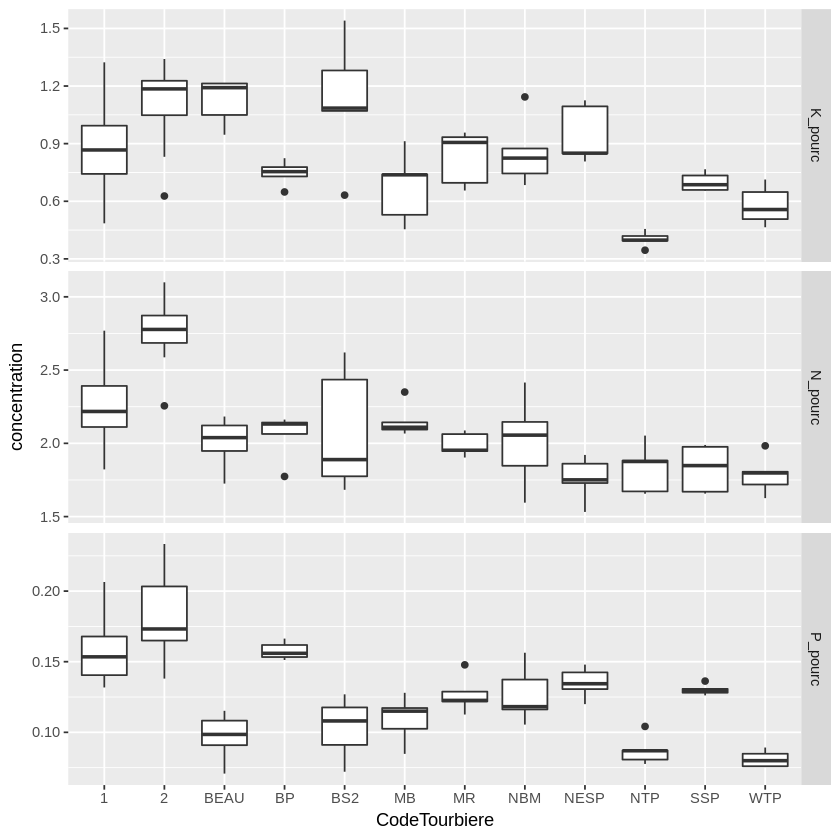

In [88]:
chicoute %>%
    select(CodeTourbiere, N_pourc, P_pourc, K_pourc) %>%
    gather(key = element, value = concentration, -CodeTourbiere) %>%
    ggplot(mapping = aes(x = CodeTourbiere, y = concentration)) +
        facet_grid(element ~ ., scales = 'free') +
        geom_boxplot()

### Combiner des tableaux

Nous avons introduit plus haut la notion de base de données. Nous voudrions peut-être utiliser le code des tourbières pour inclure leur nom, le type d'essai mené à ces tourbières, etc. Importons d'abord le tableau des noms liés aux codes.

In [89]:
tourbieres <- read_csv2("data/tourbieres.csv")
tourbieres

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  Tourbiere = col_character(),
  CodeTourbiere = col_character(),
  Type = col_character(),
  TypeCulture = col_character()
)


Tourbiere,CodeTourbiere,Type,TypeCulture
Beaulieu,BEAU,calibration,naturel
Brador Path,BP,calibration,naturel
Lichen (BS2E),2,validation,cultive sec
Mannys Brook,MB,calibration,naturel
Middle Bay Road,MR,calibration,naturel
North Est of Smelt Pond,NESP,calibration,naturel
North of Blue Moon,NBM,calibration,naturel
South of Smelt Pond,SSP,calibration,naturel
Sphaigne (BS2F),BS2,validation,cultive sec
Sphaigne (BS2F),1,calibration,naturel


Notre information est organisée en deux tableaux, liés par la colonne `CodeTourbiere`. Comment fusionner l'information pour qu'elle puisse être utilisée dans son ensemble?  La fonction `left_join` effectue cette opération typique avec les bases de données.

In [95]:
chicoute_merge <- left_join(x = chicoute, y = tourbieres, by = "CodeTourbiere")
# ou bien chicoute %>% left_join(y = tourbieres, by = "CodeTourbiere")
chicoute_merge %>% sample_n(4)

ID,CodeTourbiere,Ordre,Site,Traitement,DemiParcelle,SousTraitement,Latitude_m,Longitude_m,Rendement_g_5m2,⋯,S_pourc,B_pourc,Cu_pourc,Zn_pourc,Mn_pourc,Fe_pourc,Al_pourc,Tourbiere,Type,TypeCulture
7,BP,H,2,NA,NA,NA,5706307,484054,NA,⋯,0.14370,0.002390637,0.0001215601,0.005519615,0.052750397,0.01275287,0.003738149,Brador Path,calibration,naturel
1,BEAU,A,1,NA,NA,NA,5702454,490627,NA,⋯,0.09765,0.002578400,0.0001745158,0.004698245,0.100601771,0.01328136,0.001558297,Beaulieu,calibration,naturel
69,1,1,2,temoin,right,Cu,5702099,486528,8.696253,⋯,0.09878,0.003503088,0.0000370000,0.006705383,0.009545062,0.01943581,0.003095987,Sphaigne (BS2F),calibration,naturel
39,MR,I,4,NA,NA,NA,5701966,459894,NA,⋯,0.10530,0.001819608,0.0017420899,0.003266947,0.020774335,0.01500192,0.002116829,Middle Bay Road,calibration,naturel


D'autres types de jointures sont possibles, et décrites dans la [documentation](https://dplyr.tidyverse.org/reference/join.html).

### Opérations sur les tableaux

Les tableaux peuvent être segmentés en éléments sur lesquels on calculera ce qui nous chante. Le rendement de chicouté étant exprimé en g par 5 m², on pourra effectué un changement d'unité pour le rendre en g/m²

In [108]:
# chicoute$Rendement_g_5m2 / 5

On pourrait vouloir obtenir:

- la somme avec la function `sum()`
- la moyenne avec la function `mean()` ou la médiane avec la fonction `median()`
- l'écart-type avec la function `sd()`
- les maximum et minimum avec les fonctions `min()` et `max()`
- un décompte d'occurence avec la fonction `n()` ou `count()`

Par exemple,

In [110]:
mean(chicoute$Rendement_g_5m2, na.rm = TRUE)

[1] 13.32851

En mode classique, pour effectuer des opérations sur des tableaux, on utilisera la fonction `apply()`. Cette fonction prend, comme arguments, le tableau, l'axe (opération par ligne = 1, opération par colonne = 2), puis la fonction à appliquer.

In [112]:
apply(chicoute %>% select(contains("pourc")), 2, mean)

C_pourc      N_pourc      P_pourc      K_pourc     Ca_pourc     Mg_pourc 
5.027911e+01 2.199411e+00 1.388959e-01 8.887000e-01 3.884391e-01 4.980142e-01 
     S_pourc      B_pourc     Cu_pourc     Zn_pourc     Mn_pourc     Fe_pourc 
1.347177e-01 3.090922e-03 4.089891e-04 6.662155e-03 3.345239e-02 1.514885e-02 
    Al_pourc 
2.694979e-03

Les opération peuvent aussi être effectuées par ligne, par exemple une somme (je garde seulement les 10 premiers résultats).

In [117]:
apply(chicoute %>% select(contains("pourc")), 1, sum)[1:10]

[1] 55.64299 55.76767 54.78856 55.84453 57.89671 55.53603 55.62526 55.10991
 [9] 55.06295 55.16774

La fonction à appliquer peut être personnalisée, par exemple:

In [115]:
apply(chicoute %>% select(contains("pourc")), 2,
      function(x) (prod(x))^(1/length(x)))

C_pourc      N_pourc      P_pourc      K_pourc     Ca_pourc     Mg_pourc 
50.253429104  2.165246915  0.133754530  0.846193827  0.376192724  0.491763884 
     S_pourc      B_pourc     Cu_pourc     Zn_pourc     Mn_pourc     Fe_pourc 
 0.129900753  0.003014675  0.000000000  0.006408775  0.024140327  0.014351745 
    Al_pourc 
 0.002450982

Vous reconnaissez cette fonction? C'était la moyenne géométrique (la fonction `prod()` étant le produit d'un vecteur).

En mode tidyverse, on aura besoin principalement des fonction suivantes:

#### `group_by()` pour effectuer des opérations par groupe

L'oprération `group_by()` sépare le tableau en plusieurs petits tableaux, en attendant de les recombiner. C'est un peu l'équivalent des facettes en ggplot2...

#### `summarise()` pour réduire plusieurs valeurs en une seule

`summarise()` est l'équivalent de `apply()`: il applique un calcul sur chaque petit tableau segmenté s'il y a lieu. Il en existe quelques variantes.

- `summarise_all()` applique la fonction à toutes les colonnes
- `summarise_at()` applique la fonction aux colonnes spécifiées
- `summarise_if()` applique la fonction aux colonnes qui resortent comme `TRUE` selon une opération booléenne

#### `mutate()` pour ajotuer une nouvelle colonne

Si l'on désire ajouter une colonne à un tableau, par exemple le sommaire calculé avec `summarise()`. À l'inverse, la fonction `transmute()` retournera seulement le résultat, sans le tableau à partir duquel il a été calculé. De même que `summarise()`, `mutate()` et `transmute()` possèdent leurs équivalents `_all()`, `_at()` et `_if()`.


#### `arrange()` pour réordonner le tableau
On a déjà couvert `arrange()` dans le chapitre 3. Rappelons que cette fonction n'est pas une opération sur un tableau, mais plutôt un changement d'affichage en changeant l'ordre d'apparition des données.

Ces opérations sont décrites dans l'aide-mémoire [*Data Transformation Cheat Sheet*](https://github.com/rstudio/cheatsheets/raw/master/data-transformation.pdf).

[![](https://www.rstudio.com/wp-content/uploads/2015/01/data-transformation-cheatsheet-600x464.png)](https://github.com/rstudio/cheatsheets/raw/master/data-transformation.pdf)
Aide-mémoire de dplyr, source: https://www.rstudio.com/resources/cheatsheets/

Revenons à notre tableau des especes meancées.

In [121]:
especes_menacees <- read_csv('data/WILD_LIFE_17062017210614338.csv')

Parsed with column specification:
cols(
  IUCN = col_character(),
  `IUCN Category` = col_character(),
  SPEC = col_character(),
  Species = col_character(),
  COU = col_character(),
  Country = col_character(),
  `Unit Code` = col_character(),
  Unit = col_character(),
  `PowerCode Code` = col_integer(),
  PowerCode = col_character(),
  `Reference Period Code` = col_character(),
  `Reference Period` = col_character(),
  Value = col_integer(),
  `Flag Codes` = col_character(),
  Flags = col_character()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“491 parsing failures.
row # A tibble: 5 x 5 col     row col   expected               actual file                                expected   <int> <chr> <chr>                  <chr>  <chr>                               actual 1  1128 Value no trailing characters .933   'data/WILD_LIFE_17062017210614338.… file 2  1129 Value no trailing characters .131 

Nous avions exécuté le pipeline suivant.

In [127]:
especes_menacees %>%
    filter(IUCN == 'CRITICAL') %>%
    select(Country, Value) %>%
    group_by(Country)  %>%
    summarise(n_critical_species = sum(Value)) %>%
    arrange(desc(n_critical_species)) %>%
    top_n(10)

Selecting by n_critical_species


Country,n_critical_species
Czech Republic,2159
United States,1409
Germany,915
Japan,628
Austria,618
Slovak Republic,594
Poland,485
Switzerland,483
Brazil,453
Belgium,424


Ce pipeline consistait à:

```
prendre le tableau especes_menacees, puis
    filtrer pour n'obtenir que les espèces critiques, puis
    sélectionner les colonnes des pays et des valeurs (nombre d'espèces), puis
    segmenter le tableaux en plusieurs tableaux selon le pays, puis
    appliquer la fonction sum pour chacun de ces petits tableaux (puis de recombiner ces sommaires), puis
    trier les pays en nombre décroissant de décompte d'espèces, puis
    afficher le top 10
```

Pour revenir à notre tableau `chicoute`, imaginez que vous aviez une station météo (station_A) située aux coordonnées (490640, 5702453) et que vous désiriez calculer la distance entre l'observation et la station. Prenez du temps pour réfléchir à la manière dont vous procéderez... 

On pourra créer une fonction qui mesure la distance entre un point x, y et les coordonnées de la station A...

In [159]:
dist_station_A <- function (x, y) {
    return(sqrt((x - 490640)^2 + (y - 5702453)^2))
}

... puis ajouter une colonne avec mutate grâce à une fonction prenant les arguments x et y spécifiés.

In [160]:
chicoute %>%
    mutate(dist = dist_station_A(x = Longitude_m, y= Latitude_m)) %>%
    select(ID, CodeTourbiere, Longitude_m, Latitude_m, dist) %>%
    top_n(10)

Selecting by dist


ID,CodeTourbiere,Longitude_m,Latitude_m,dist
7,BP,484054,5706307,7630.774
36,MR,459875,5701988,30768.514
37,MR,459873,5701987,30770.529
38,MR,459880,5701971,30763.776
39,MR,459894,5701966,30749.857
40,MR,459915,5701994,30728.428
46,NBM,485975,5695688,8217.509
48,NBM,485912,5696607,7518.624
49,NBM,485903,5696611,7521.179
50,NBM,485884,5696612,7532.385


Nous pourrions procéder de la même manière pour fusionner des données climatiques. Le tableau `chicoute` ne possède pas d'indicateurs climatiques, mais il est possible de les soutirer de stations météos placées près des site. Ces données ne sont pas disponibles pour le tableau de la chicouté, alors j'utiliserai des données fictives pour l'exemple.

Voici ce qui pourrait être fait.

1. Créer un tableau des stations météo ainsi que des indices météo associés à ces stations.
2. Lier chaque site à une station (à la main où selon la plus petite distance entre le site et la station).
3. Fusionner les inices climatiques aux sites, puis les sites aux mesures de rendement.

Ces opérations demandent habituellement du tâtonnement. Il serait surprenant que même une personne expérimentée soit en mesure de compiler ces opérations sans obtenir de message d'erreur, et retravailler jusqu'à obtenir le résultat souhaité. L'objectif de cette section est de vous présenté un flux de travail que vous pourriez être amenés à effectuer et de fournir quelques éléments nouveau pour mener à bien une opération. Il peut être frustant de ne pas saisir toutes les opérations: passez à travers cette section sans jugement. Si vous devez vous frotter à problème semblable, vous saurez que vous trouverez dans ce manuel une recette intéressante.

D'abord créer un tableau des stations.

In [176]:
stations <- data.frame(Station = c('A', 'B', 'C'),
                       Longitude_m = c(490640, 484870, 485929),
                       Latitude_m = c(5702453, 5701870, 5696421), 
                       t_moy_C = c(13.8, 18.2, 16.30),
                       prec_tot_mm = c(687, 714, 732))
stations

Station,Longitude_m,Latitude_m,t_moy_C,prec_tot_mm
A,490640,5702453,13.8,687
B,484870,5701870,18.2,714
C,485929,5696421,16.3,732


La fonction suivante calcule la distance entre des coordonnées x et y et chaque station d'un tableau de stations, puis retourne le nom de la station dont la distance est la moindre.

In [177]:
dist_station <- function (x, y, stations_df) {
    # stations est le tableau des stations à trois colonnes
    # 1iere: nom de la station
    # 2ieme: longiture
    # 3ieme: latitude
    distance <- c()
    for (i in 1:nrow(stations)) {
        distance[i] <- sqrt((x - stations[i, 2])^2 + (y - stations[i, 3])^2)
    }
    nom_station <- as.character(stations$Station[which.min(distance)])
    return(nom_station)
}

Testons la fonction avec des coordonnées.

In [178]:
dist_station(x = 459875, y = 5701988, stations_df = stations)

[1] "B"

Nous appliquons cette fonction à toutes les lignes du tableau, puis en retournons un échantillon.

In [180]:
chicoute %>%
    rowwise() %>%
    mutate(Station = dist_station(x = Longitude_m, y = Latitude_m, stations_df = stations)) %>%
    select(ID, CodeTourbiere, Longitude_m, Latitude_m, Station) %>%
    sample_n(10)

ID,CodeTourbiere,Longitude_m,Latitude_m,Station
84,1,486514,5702160,B
86,WTP,487075,5700788,B
78,1,486499,5702076,B
70,1,486488,5702120,B
50,NBM,485884,5696612,C
33,MB,491947,5699330,A
18,2,486501,5702627,B
16,2,486498,5702643,B
6,BP,484865,5706394,B
39,MR,459894,5701966,B


Cela semble fonctionner. On peut y ajouter un `left_join()` pour joindre les données météo au tableau principal.

In [182]:
chicoute_weather <- chicoute %>%
    rowwise() %>%
    mutate(Station = dist_station(x = Longitude_m, y = Latitude_m, stations_df = stations)) %>%
    left_join(y = stations, by = "Station")
chicoute_weather %>% sample_n(10)

Warning message:
“Column `Station` joining character vector and factor, coercing into character vector”

ID,CodeTourbiere,Ordre,Site,Traitement,DemiParcelle,SousTraitement,Latitude_m.x,Longitude_m.x,Rendement_g_5m2,⋯,Cu_pourc,Zn_pourc,Mn_pourc,Fe_pourc,Al_pourc,Station,Longitude_m.y,Latitude_m.y,t_moy_C,prec_tot_mm
10,BP,H,5,NA,NA,NA,5706364,484780,NA,⋯,0.0000370000,0.006184506,0.035728063,0.011836155,0.003466040,B,484870,5701870,18.2,714
81,1,4,8,temoin,right,Cu,5702081,486504,23.05768,⋯,0.0011217835,0.007330449,0.024631368,0.021298317,0.001954111,B,484870,5701870,18.2,714
9,BP,H,4,NA,NA,NA,5706324,484761,NA,⋯,0.0000370000,0.006812606,0.028301634,0.012288495,0.003589784,B,484870,5701870,18.2,714
40,MR,I,5,NA,NA,NA,5701994,459915,NA,⋯,0.0042487033,0.005352355,0.008643213,0.027685856,0.004586002,B,484870,5701870,18.2,714
35,MB,C,5,NA,NA,NA,5699362,491949,NA,⋯,0.0000370000,0.006787259,0.049084551,0.014125567,0.001512923,A,490640,5702453,13.8,687
24,2,9,17,fertilisant,right,Cu,5702544,486327,0.00000,⋯,0.0002930000,0.008305379,0.018796592,0.009190759,0.002604718,B,484870,5701870,18.2,714
42,NESP,J,2,NA,NA,NA,5701876,484870,NA,⋯,0.0007051523,0.005626151,0.035929997,0.017286749,0.003181160,B,484870,5701870,18.2,714
68,1,1,2,temoin,left,Control,5702099,486528,6.41800,⋯,0.0000370000,0.005535679,0.008103199,0.010448109,0.001573198,B,484870,5701870,18.2,714
21,2,8,16,temoin,left,Control,5702537,486524,0.00000,⋯,0.0006820000,0.007338812,0.014087521,0.009922731,0.002539868,B,484870,5701870,18.2,714
13,2,6,12,temoin,left,Control,5702562,486538,0.00000,⋯,0.0009860000,0.008256900,0.013330579,0.011007260,0.002797288,B,484870,5701870,18.2,714


### Exporter un tableau

Simplement avec `write_csv()`.

In [183]:
write_csv(chicoute_weather, "data/chicoute_weather.csv")

### Aller plus loin dans le tidyverse

Le livre [R for Data Science](http://r4ds.had.co.nz), de Garrett Grolemund et Hadley Wickham, est un incontournable.

[<img src="http://r4ds.had.co.nz/cover.png" width=200>](http://r4ds.had.co.nz)

## Références

Parent L.E., Parent, S.É., Herbert-Gentile, V., Naess, K. et  Lapointe, L. 2013. Mineral Balance Plasticity of Cloudberry (Rubus chamaemorus) in Quebec-Labrador Bogs. American Journal of Plant Sciences, 4, 1508-1520. DOI: 10.4236/ajps.2013.47183 